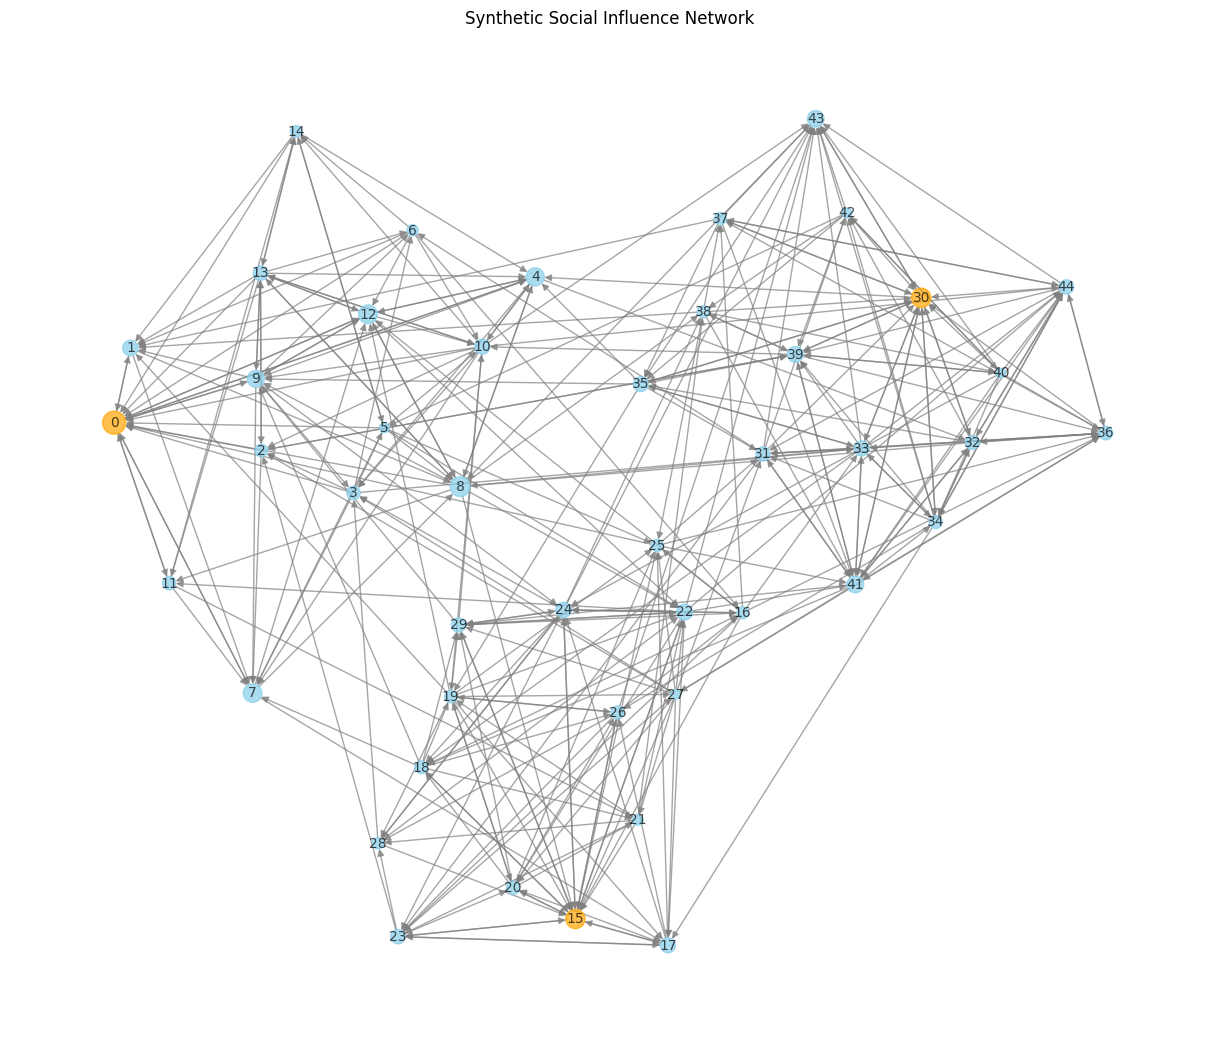


Top 5 nodes by PageRank:
Rank	Node	PageRank Score
1	0	0.055153
2	8	0.040446
3	30	0.038954
4	15	0.038308
5	12	0.036190


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_social_influence_network():
    # Create a directed graph
    G = nx.DiGraph()
    
    # Define clusters and influencers
    num_clusters = 3
    cluster_size = 15
    total_nodes = num_clusters * cluster_size
    intra_cluster_prob = 0.3
    inter_cluster_prob = 0.05
    
    # Track influencer nodes for each cluster
    influencers = []
    
    # Generate clusters
    for i in range(num_clusters):
        # Nodes for this cluster
        nodes = range(i * cluster_size, (i + 1) * cluster_size)
        G.add_nodes_from(nodes)
        
        # Define influencer (first node in each cluster)
        influencer = nodes[0]
        influencers.append(influencer)
        
        # Create intra-cluster connections with higher probability
        for u in nodes:
            for v in nodes:
                if u != v and np.random.rand() < intra_cluster_prob:
                    G.add_edge(u, v)
        
        # Add connections from all nodes in cluster to influencer
        for u in nodes:
            if u != influencer:
                G.add_edge(u, influencer)
    
    # Create inter-cluster connections with lower probability
    for i in range(total_nodes):
        for j in range(i + 1, total_nodes):
            if np.random.rand() < inter_cluster_prob:
                G.add_edge(i, j)
            if np.random.rand() < inter_cluster_prob:
                G.add_edge(j, i)
    
    return G, influencers

def visualize_graph(G, influencers):
    # Calculate PageRank to size nodes by influence
    pagerank = nx.pagerank(G)
    node_sizes = [5000 * pagerank[node] for node in G.nodes()]
    node_colors = ['skyblue' if node not in influencers else 'orange' for node in G.nodes()]
    
    # Visualize the graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)  # Use a force-directed layout for clarity
    nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, with_labels=True, font_size=10, edge_color='gray', alpha=0.7, arrowsize=10)
    plt.title("Synthetic Social Influence Network")
    plt.show()

def display_pagerank_top_nodes(G):
    pagerank_scores = nx.pagerank(G)
    sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
    print("\nTop 5 nodes by PageRank:")
    print("Rank\tNode\tPageRank Score")
    for i, (node, score) in enumerate(sorted_pagerank[:5], start=1):
        print(f"{i}\t{node}\t{score:.6f}")

# Create and visualize the graph
G, influencers = create_social_influence_network()
visualize_graph(G, influencers)
display_pagerank_top_nodes(G)
